# Analyze activation values

### Load data

In [2]:
import numpy as np
fast_model_fast_data = np.load("nighttime_ai_fast_synth_model_fast_synth_data_activations.npy")
fast_model_slow_data = np.load("nighttime_ai_fast_synth_model_slow_data_activations.npy")
slow_model_fast_data = np.load("nighttime_ai_slow_model_fast_synth_data_activations.npy")
slow_model_slow_data = np.load("nighttime_ai_slow_model_slow_data_activations.npy")

[d.shape for d in (fast_model_fast_data, fast_model_slow_data, slow_model_fast_data, slow_model_slow_data)]


[(10150, 256), (10150, 256), (10150, 256), (10150, 256)]

In [3]:
# check if ReLu was applied
[np.min(d) for d in (fast_model_fast_data, fast_model_slow_data, slow_model_fast_data, slow_model_slow_data)]


[0.0, 0.0, 0.0, 0.0]

In [4]:
[np.max(d) for d in (fast_model_fast_data, fast_model_slow_data, slow_model_fast_data, slow_model_slow_data)]


[5.082, 3.758, 4.14, 4.742]

In [5]:
[np.mean(d) for d in (fast_model_fast_data, fast_model_slow_data, slow_model_fast_data, slow_model_slow_data)]


[0.28, 0.2646, 0.332, 0.31]

In [6]:
[np.median(d) for d in (fast_model_fast_data, fast_model_slow_data, slow_model_fast_data, slow_model_slow_data)]


[0.0, 0.0, 0.0, 0.0]

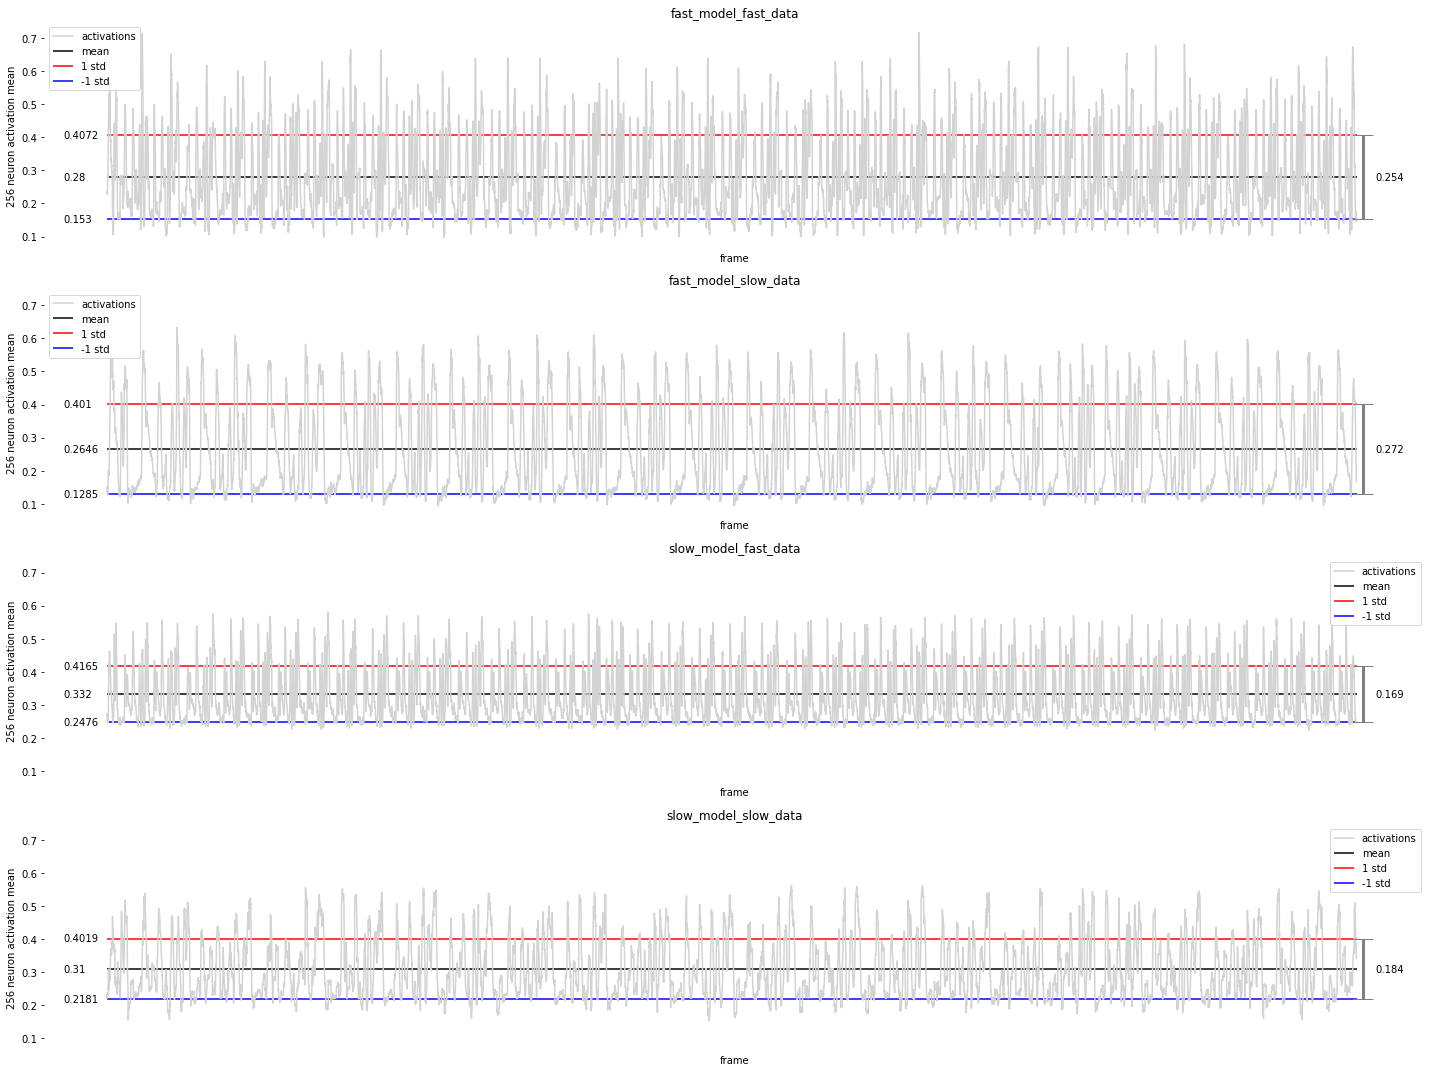

In [7]:
from matplotlib import pyplot as plt

frame_activations = dict(
    fast_model_fast_data=fast_model_fast_data.mean(axis=1),
    fast_model_slow_data=fast_model_slow_data.mean(axis=1),
    slow_model_fast_data=slow_model_fast_data.mean(axis=1),
    slow_model_slow_data=slow_model_slow_data.mean(axis=1),
)

def plot_activations(activations, ylabel, xlabel):
    fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(20, 15), sharex='all', sharey='all')
    for (name, data), ax in zip(activations.items(), axs.flat):
        ax.set(title=name, ylabel=ylabel, xlabel=xlabel)
        # ax.grid(True, axis='y')
        ax.plot(data, 'lightgrey', label='activations')
        linewtext(ax, len(data), data.mean(), 'mean', 'black')
        linewtext(ax, len(data), data.mean()+data.std(), '1 std', 'red')
        linewtext(ax, len(data), data.mean()-data.std(), '-1 std', 'blue')
        two_std_bar(ax, data)
        ax.legend()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.get_xaxis().set_ticks([])
    fig.tight_layout()
    plt.show()


def two_std_bar(ax, data):
    ax.errorbar(1.005 * len(data), data.mean(), yerr=data.std(), ecolor='grey', elinewidth=3, capsize=10)
    ax.text(1.015 * len(data), data.mean(), np.round(2 * data.std(), 3), ha='left', va='center')


def linewtext(ax, length, value, label, color):
    ax.text(-0.035 * length, value, value, ha='left', va='center')
    ax.hlines(value, 0, length, color, label=label)


plot_activations(frame_activations, '256 neuron activation mean', 'frame')

In [8]:
fast_model_fast_data_neuron_means = np.mean(fast_model_fast_data, axis=0)
fast_model_slow_data_neuron_means = np.mean(fast_model_slow_data, axis=0)
slow_model_fast_data_neuron_means = np.mean(slow_model_fast_data, axis=0)
slow_model_slow_data_neuron_means = np.mean(slow_model_slow_data, axis=0)

[d.mean() for d in [
    fast_model_fast_data_neuron_means,
    fast_model_slow_data_neuron_means,
    slow_model_fast_data_neuron_means,
    slow_model_slow_data_neuron_means,
]]

[0.28, 0.2646, 0.332, 0.31]

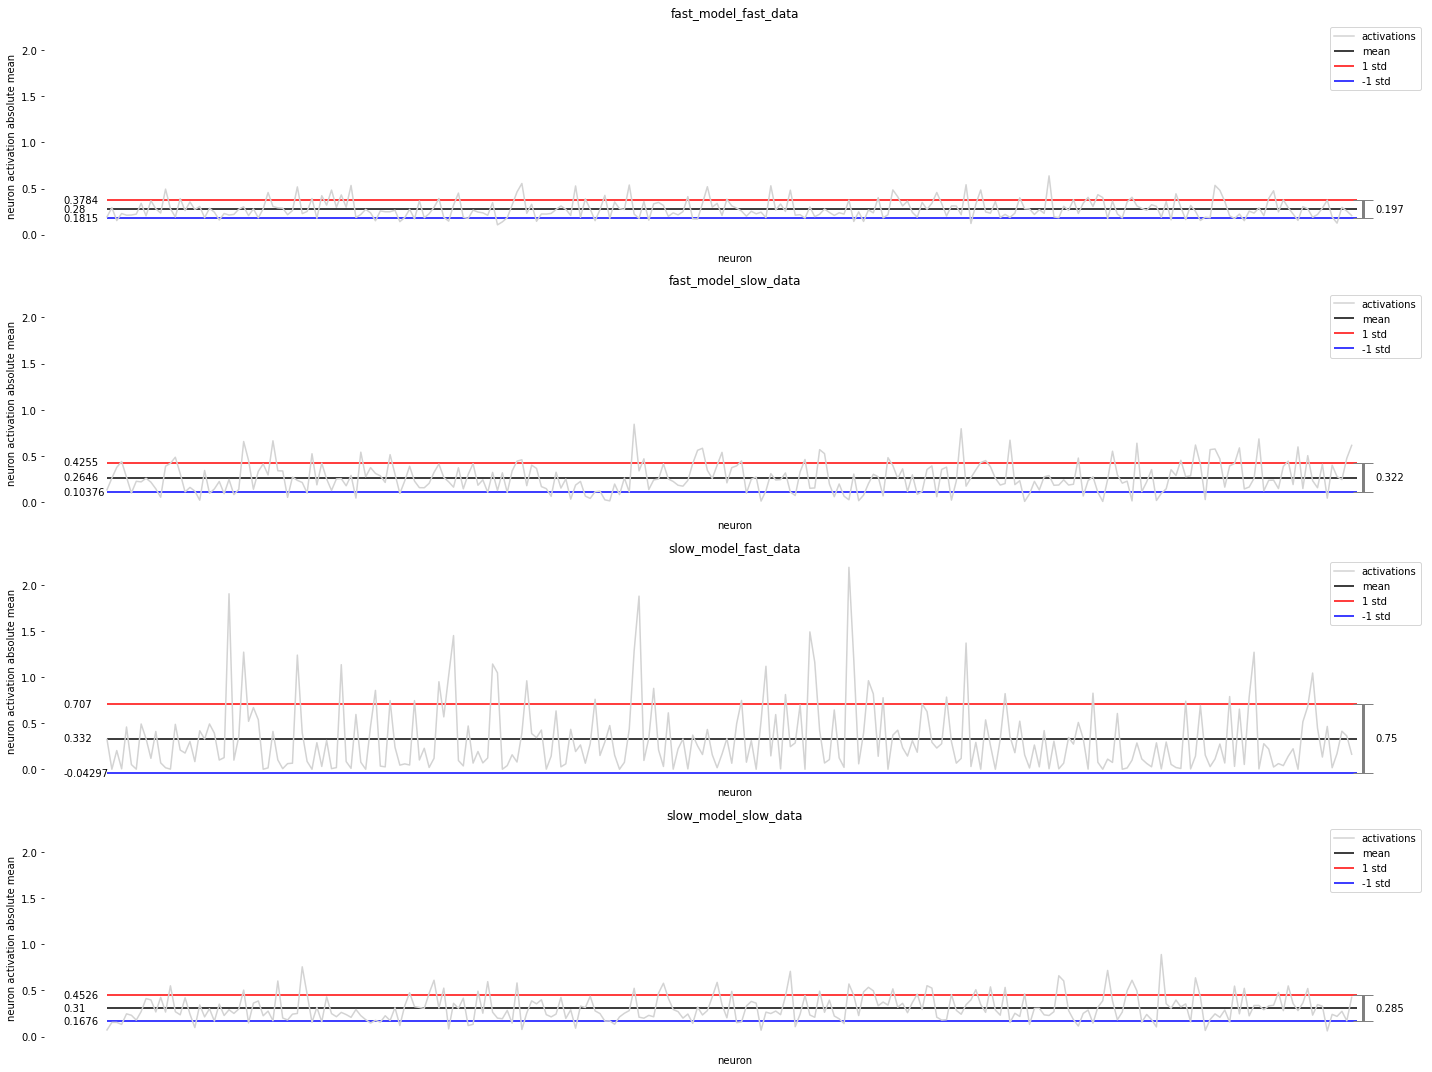

In [9]:
neuron_activations = dict(
    fast_model_fast_data=fast_model_fast_data.mean(axis=0),
    fast_model_slow_data=fast_model_slow_data.mean(axis=0),
    slow_model_fast_data=slow_model_fast_data.mean(axis=0),
    slow_model_slow_data=slow_model_slow_data.mean(axis=0),
)

plot_activations(neuron_activations, 'neuron activation absolute mean', 'neuron')

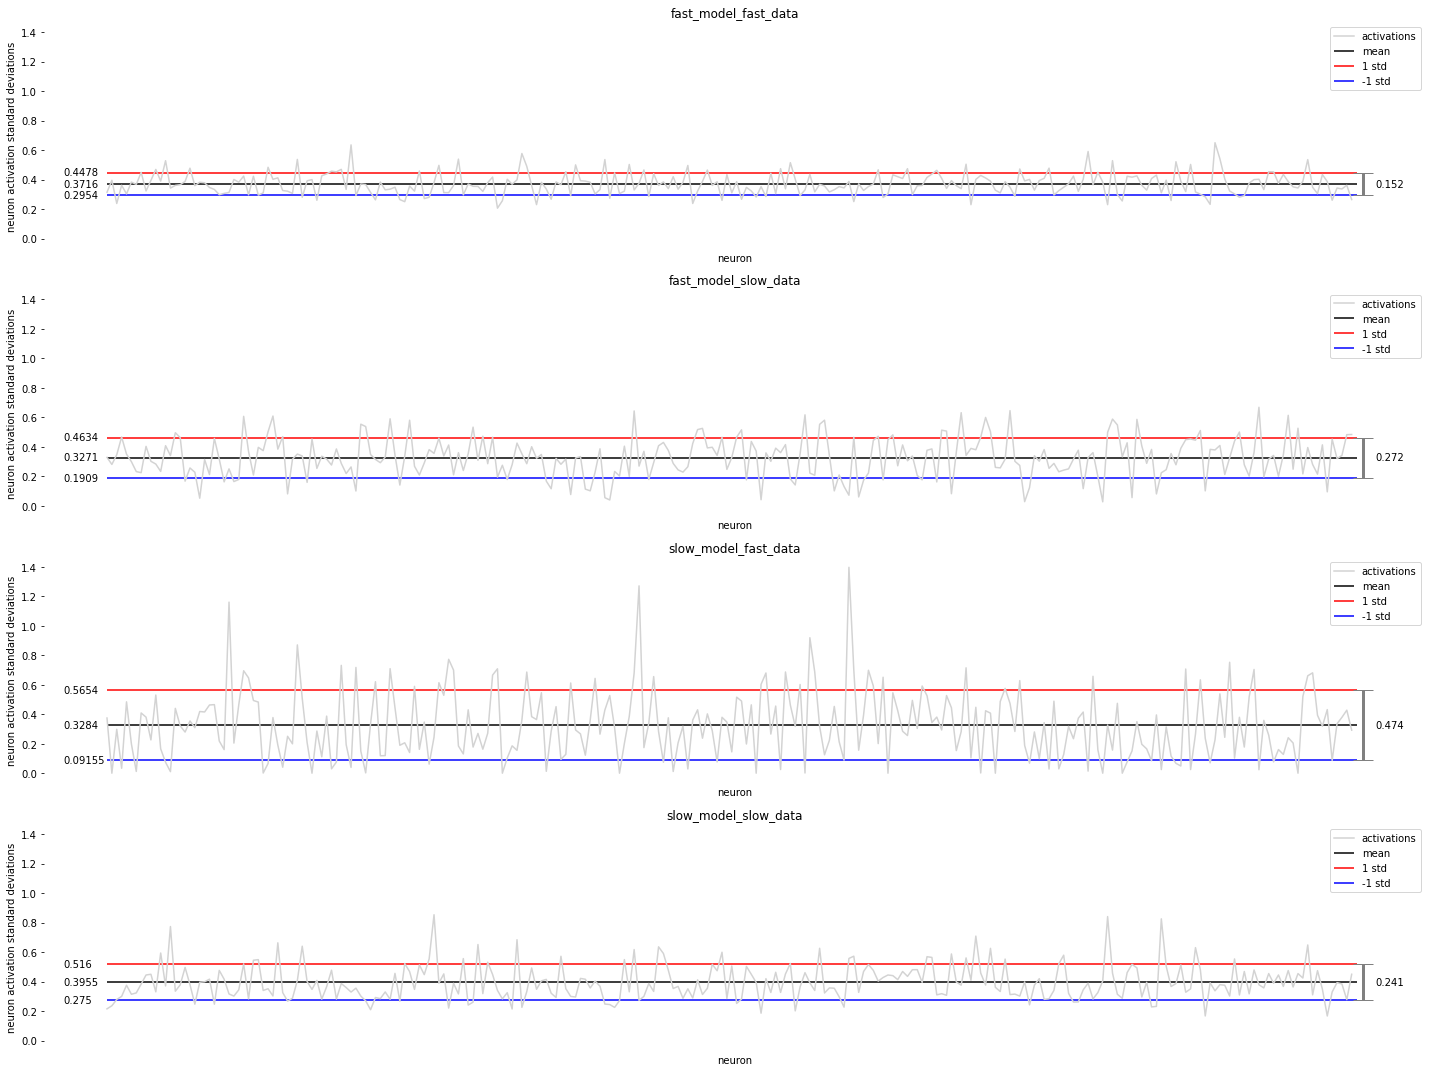

In [10]:
neuron_activations = dict(
    fast_model_fast_data=fast_model_fast_data.std(axis=0),
    fast_model_slow_data=fast_model_slow_data.std(axis=0),
    slow_model_fast_data=slow_model_fast_data.std(axis=0),
    slow_model_slow_data=slow_model_slow_data.std(axis=0),
)

plot_activations(neuron_activations, 'neuron activation standard deviations', 'neuron')

In [11]:

fast_model_fast_data_neuron_std = np.std(fast_model_fast_data, axis=0)
fast_model_slow_data_neuron_std = np.std(fast_model_slow_data, axis=0)
slow_model_fast_data_neuron_std = np.std(slow_model_fast_data, axis=0)
slow_model_slow_data_neuron_std = np.std(slow_model_slow_data, axis=0)

[d.std() for d in [
    fast_model_fast_data_neuron_std,
    fast_model_slow_data_neuron_std,
    slow_model_fast_data_neuron_std,
    slow_model_slow_data_neuron_std,
]]

[0.07605, 0.1362, 0.2368, 0.12054]

In [12]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy.stats import skew

skewness_test_fast = skew(fast_model_fast_data, axis=1)
skewness_ood_fast = skew(fast_model_slow_data, axis=1)
skewness_test_slow = skew(slow_model_slow_data, axis=1)
skewness_ood_slow = skew(slow_model_fast_data, axis=1)

fast_IND_skewness = np.vstack([np.zeros(len(skewness_test_fast)), skewness_test_fast]).T
fast_OOD_skewness = np.vstack([np.ones(len(skewness_ood_fast)), skewness_ood_fast]).T
slow_IND_skewness = np.vstack([np.zeros(len(skewness_test_slow)), skewness_test_slow]).T
slow_OOD_skewness = np.vstack([np.ones(len(skewness_ood_slow)), skewness_ood_slow]).T



/Users/kristjan.roosild/opt/miniconda3/envs/donkey/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


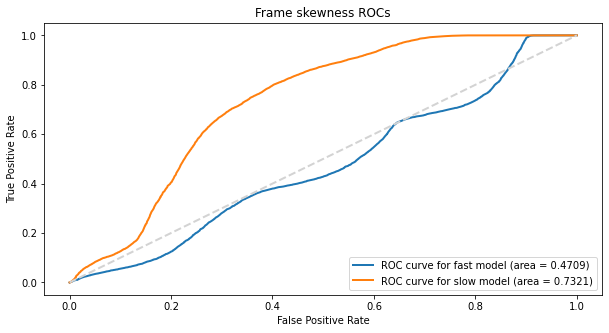

In [13]:

plt.figure(figsize=(10,5))

def plot_curve(data, title_part, color):
    y_true = data[:, 0]
    y_score = data[:, 1]
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(
        fpr,
        tpr,
        color=color,
        lw=2,
        label=f"ROC curve for {title_part} (area = %0.4f)" % roc_auc,
    )


plot_curve(np.concatenate((fast_IND_skewness, fast_OOD_skewness,)), 'fast model', 'C0')
plot_curve(np.concatenate((slow_IND_skewness, slow_OOD_skewness,)), 'slow model', 'C1')
plt.plot([0, 1], [0, 1], color="lightgray", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.title('Frame skewness ROCs')
plt.show()

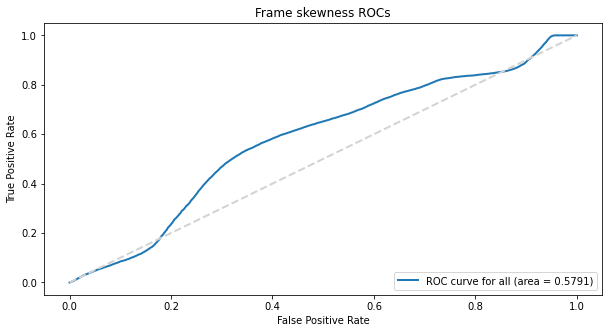

In [14]:

plt.figure(figsize=(10,5))

def plot_curve(data, title_part, color):
    y_true = data[:, 0]
    y_score = data[:, 1]
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(
        fpr,
        tpr,
        color=color,
        lw=2,
        label=f"ROC curve for {title_part} (area = %0.4f)" % roc_auc,
    )


plot_curve(np.concatenate((slow_IND_skewness, slow_OOD_skewness,fast_IND_skewness, fast_OOD_skewness,)), 'all', 'C0')
plt.plot([0, 1], [0, 1], color="lightgray", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.title('Frame skewness ROCs')
plt.show()